## 共通処理

In [12]:
# 必要なパッケージをインポート
# NumPy用ライブラリ
import numpy as np
# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt
# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib
# pandas用ライブラリ
import pandas as pd
# データフレーム表示用関数
from IPython.display import display
# seaborn
import seaborn as sns
# 表示オプション調整
# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode='fixed')
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)
# 方眼表示ON
plt.rcParams['axes.grid'] = True
# データフレームでの表示精度
pd.options.display.float_format = '{:.3f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)


In [13]:
import pymc as pm
import arviz as az

## ch5

### データ分布のベイズ推論( 特定項目の観測値の統計的性質)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

(50, 5)


<Axes: xlabel='sepal_length', ylabel='Count'>

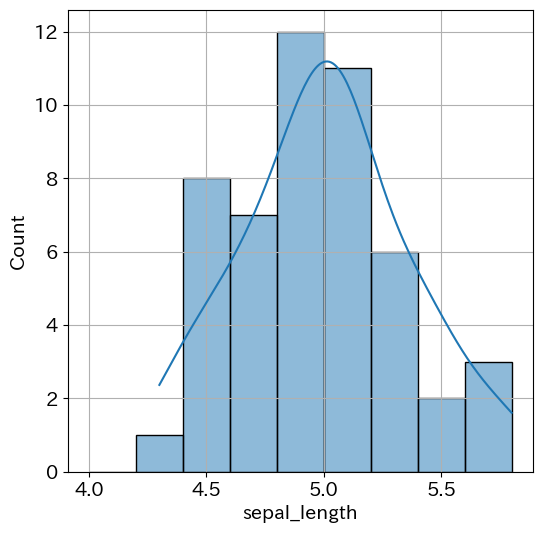

In [26]:
# 分析データの可視化
df = sns.load_dataset("iris")
display(df["species"].value_counts())

df1 = df[df["species"] == "setosa"]
print(df1.shape)

sns.histplot(df1["sepal_length"], bins = np.arange(4, 6, 0.2), kde = True)

50


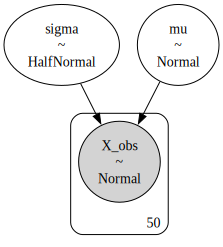

In [31]:
# データ準備
X = df1["sepal_length"].values
print(len(X))

# 確率モデル定義
model = pm.Model()
with model:
    # 事前分布
    mu = pm.Normal("mu", mu = 0.0, sigma = 10.0)
    sigma = pm.HalfNormal("sigma", sigma = 10.0)

    # 確率モデル
    X_obs = pm.Normal("X_obs", mu = mu, sigma = sigma, observed = X)

g = pm.model_to_graphviz(model)
display(g)


In [32]:
# サンプリング
with model:
    idata1 = pm.sample(
        chains = 2,
        tune = 1000,
        draws = 1000,
        random_seed = 42
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 33 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,5.006,0.053,4.908,5.108,0.001,0.001,1988.000,1081.000,1.000
sigma,0.364,0.038,0.289,0.432,0.001,0.001,1619.000,1201.000,1.010


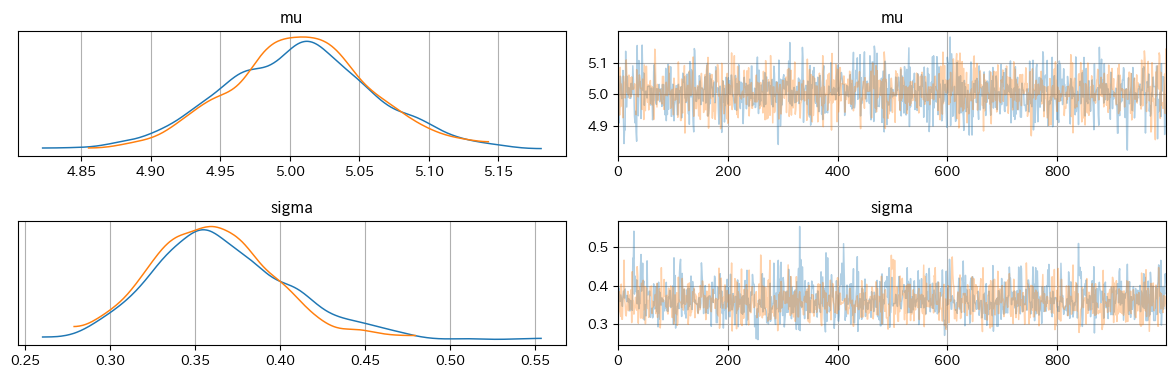

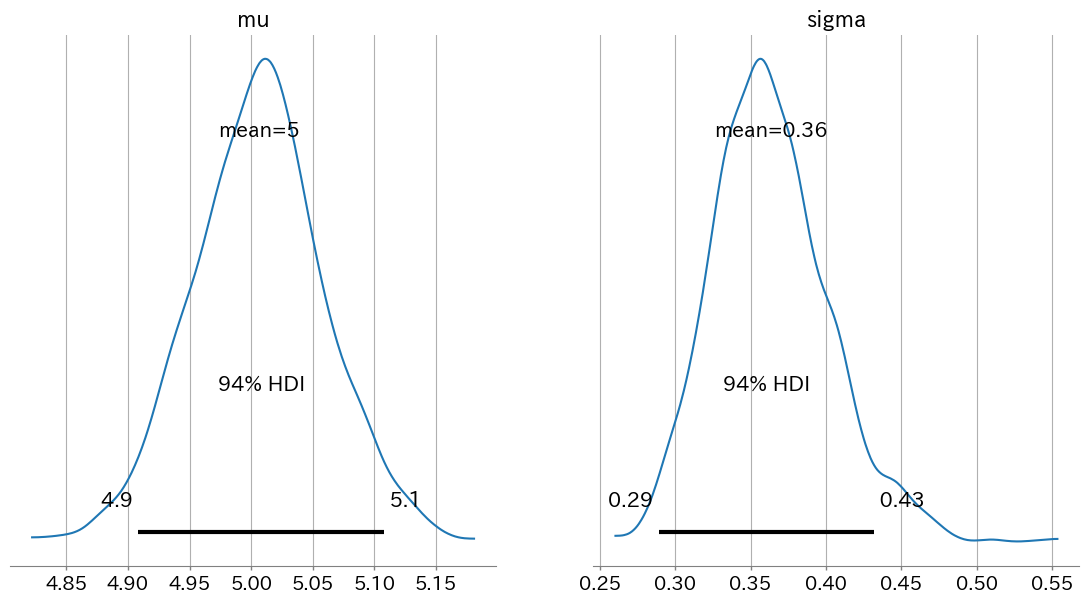

In [37]:
az.plot_trace(idata1, compact = False)
plt.tight_layout();

az.plot_posterior(idata1);

summary1 = az.summary(idata1)
display(summary1)

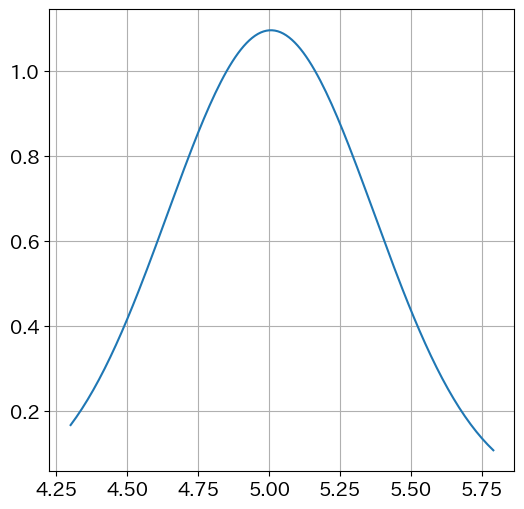

In [42]:
def norm(x, mu, sigma):
    y = (x-mu)/sigma
    a = np.exp(-(y**2)/2)
    b = np.sqrt(2*np.pi)*sigma
    return a/b

mu_mean = summary1.loc["mu", "mean"]
sigma_mean = summary1.loc["sigma", "mean"]

x = np.arange(X.min(), X.max(), 0.01)
y = norm(x, mu_mean, sigma_mean)
plt.plot(x, y)

#### サンプルサイズを小さくして

5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 12 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


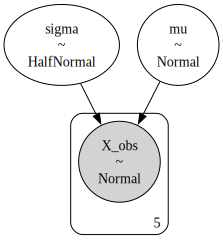

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,4.862,0.180,4.539,5.219,0.007,0.005,809.000,626.000,1.000
sigma,0.334,0.205,0.117,0.705,0.009,0.006,500.000,643.000,1.000


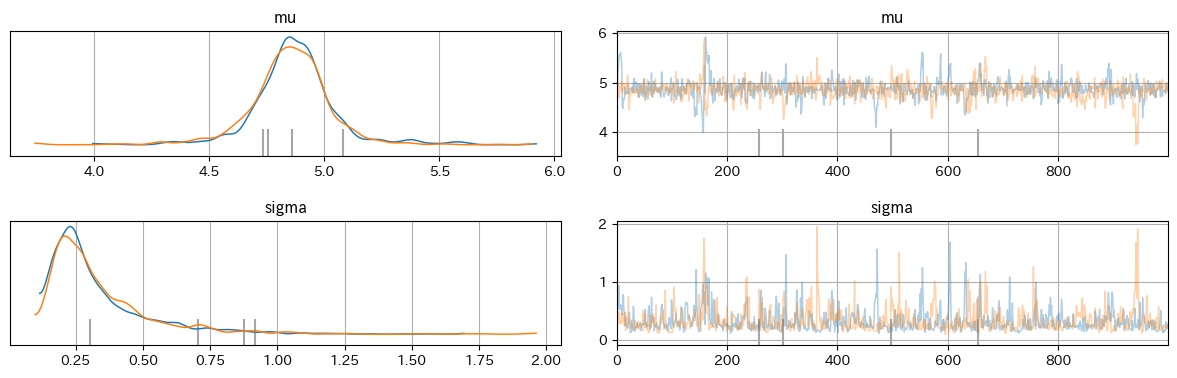

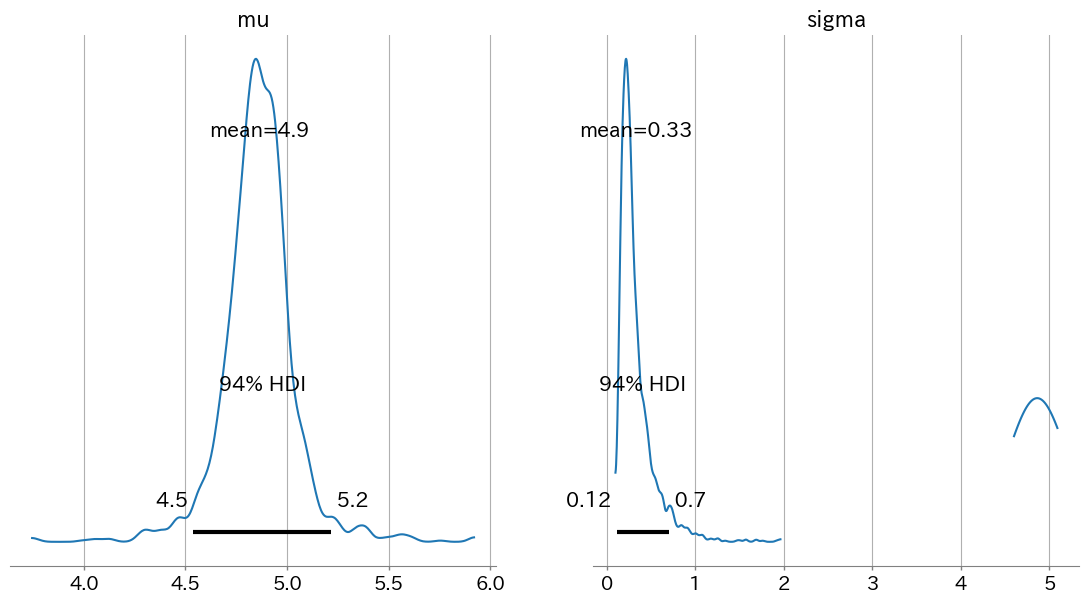

In [44]:
# 小さいサンプルサイズで推論

# データ準備
X = df1["sepal_length"].values[:5]
print(len(X))

# 確率モデル定義
model2 = pm.Model()
with model2:
    # 事前分布
    mu = pm.Normal("mu", mu = 0.0, sigma = 10.0)
    sigma = pm.HalfNormal("sigma", sigma = 10.0)

    # 確率モデル
    X_obs = pm.Normal("X_obs", mu = mu, sigma = sigma, observed = X)

    # サンプリング
    idata2 = pm.sample(
        chains = 2,
        tune = 1000,
        draws = 1000,
        random_seed = 42
    )

g = pm.model_to_graphviz(model2)
display(g)

az.plot_trace(idata2, compact = False)
plt.tight_layout();

az.plot_posterior(idata2);

summary2 = az.summary(idata2)
display(summary2)



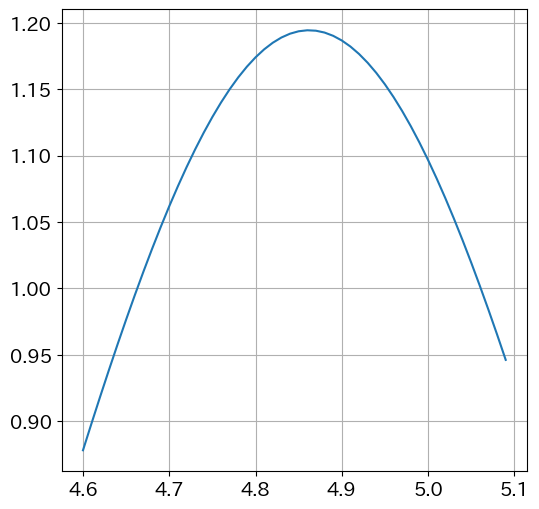

In [45]:
def norm(x, mu, sigma):
    y = (x-mu)/sigma
    a = np.exp(-(y**2)/2)
    b = np.sqrt(2*np.pi)*sigma
    return a/b

mu_mean = summary2.loc["mu", "mean"]
sigma_mean = summary2.loc["sigma", "mean"]

x = np.arange(X.min(), X.max(), 0.01)
y = norm(x, mu_mean, sigma_mean)
plt.plot(x, y)